In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('blogs.csv')
data.head()

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Data    2000 non-null   object
 1   Labels  2000 non-null   object
dtypes: object(2)
memory usage: 31.4+ KB


In [4]:
data.nunique()

Data      2000
Labels      20
dtype: int64

In [5]:
print(data[['Data','Labels']])

                                                   Data              Labels
0     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
1     Newsgroups: alt.atheism\nPath: cantaloupe.srv....         alt.atheism
2     Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...         alt.atheism
3     Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...         alt.atheism
4     Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...         alt.atheism
...                                                 ...                 ...
1995  Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...  talk.religion.misc
1996  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1997  Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...  talk.religion.misc
1998  Xref: cantaloupe.srv.cs.cmu.edu talk.religion....  talk.religion.misc
1999  Xref: cantaloupe.srv.cs.cmu.edu sci.skeptic:43...  talk.religion.misc

[2000 rows x 2 columns]


### Text Processing

In [6]:
stopwords= {
    "a","about","above","after","again","against","all","am","an","and","any","are",
    "as","at","be","because","been","before","being","below","between","both","but",
    "by","could","did","do","does","doing","down","during","each","few","for","from",
    "further","had","has","have","having","he","her","here","hers","herself","him",
    "himself","his","how","i","if","in","into","is","it","its","itself","just",
    "me","more","most","my","myself","no","nor","not","now","of","off","on","once",
    "only","or","other","our","ours","ourselves","out","over","own","same","she",
    "should","so","some","such","than","that","the","their","theirs","them",
    "themselves","then","there","these","they","this","those","through","to","too",
    "under","until","up","very","was","we","were","what","when","where","which",
    "while","who","whom","why","will","with","you","your","yours","yourself",
    "yourselves"
}

In [8]:
import re
text_col=data['Data']
def preprocess(text: str) -> str:
    if not isinstance(text, str):
        return ""
    text = text.lower()
    tokens = re.findall(r"[a-z]+", text)
    tokens = [t for t in tokens if t not in stopwords and len(t) > 1]
    return " ".join(tokens)
data['Data']=data['Data'].apply(preprocess)
data['Data']

0       path cantaloupe srv cs cmu edu magnesium club ...
1       newsgroups alt atheism path cantaloupe srv cs ...
2       path cantaloupe srv cs cmu edu das news harvar...
3       path cantaloupe srv cs cmu edu magnesium club ...
4       xref cantaloupe srv cs cmu edu alt atheism tal...
                              ...                        
1995    xref cantaloupe srv cs cmu edu talk abortion a...
1996    xref cantaloupe srv cs cmu edu talk religion m...
1997    xref cantaloupe srv cs cmu edu talk origins ta...
1998    xref cantaloupe srv cs cmu edu talk religion m...
1999    xref cantaloupe srv cs cmu edu sci skeptic tal...
Name: Data, Length: 2000, dtype: object

In [18]:
data['Labels'].value_counts()

alt.atheism                 100
comp.graphics               100
talk.politics.misc          100
talk.politics.mideast       100
talk.politics.guns          100
soc.religion.christian      100
sci.space                   100
sci.med                     100
sci.electronics             100
sci.crypt                   100
rec.sport.hockey            100
rec.sport.baseball          100
rec.motorcycles             100
rec.autos                   100
misc.forsale                100
comp.windows.x              100
comp.sys.mac.hardware       100
comp.sys.ibm.pc.hardware    100
comp.os.ms-windows.misc     100
talk.religion.misc          100
Name: Labels, dtype: int64

### Data Split

Data is well Balanced

In [9]:
X=data['Data']
X

0       path cantaloupe srv cs cmu edu magnesium club ...
1       newsgroups alt atheism path cantaloupe srv cs ...
2       path cantaloupe srv cs cmu edu das news harvar...
3       path cantaloupe srv cs cmu edu magnesium club ...
4       xref cantaloupe srv cs cmu edu alt atheism tal...
                              ...                        
1995    xref cantaloupe srv cs cmu edu talk abortion a...
1996    xref cantaloupe srv cs cmu edu talk religion m...
1997    xref cantaloupe srv cs cmu edu talk origins ta...
1998    xref cantaloupe srv cs cmu edu talk religion m...
1999    xref cantaloupe srv cs cmu edu sci skeptic tal...
Name: Data, Length: 2000, dtype: object

In [10]:
Y=data['Labels']
Y

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [11]:
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.2,random_state=42)
X_train.shape,X_test.shape,Y_train.shape,Y_test.shape

((1600,), (400,), (1600,), (400,))

### Bag of Words

In [12]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect=CountVectorizer()

In [13]:
X_train_counts=count_vect.fit_transform(X_train)
X_train_counts.shape

(1600, 34458)

### TF IDF

In [14]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vect=TfidfVectorizer()

In [15]:
X_train_idf=tfidf_vect.fit_transform(X_train)
X_train_idf.shape

(1600, 34458)

### Pipeline For Vectorisation and Classification Using MultinomialNB

In [16]:
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import classification_report, confusion_matrix

text_data=Pipeline([
    ('tfidf',TfidfVectorizer()),('clf',MultinomialNB())
])

text_data.fit(X_train,Y_train)

Pipeline(steps=[('tfidf', TfidfVectorizer()), ('clf', MultinomialNB())])

In [17]:
prediction=text_data.predict(X_train)
prediction

array(['rec.sport.baseball', 'comp.os.ms-windows.misc', 'rec.motorcycles',
       ..., 'rec.motorcycles', 'sci.space', 'sci.crypt'], dtype='<U24')

In [18]:
print(classification_report(Y_train,prediction))

                          precision    recall  f1-score   support

             alt.atheism       0.90      0.99      0.94        82
           comp.graphics       0.99      0.99      0.99        82
 comp.os.ms-windows.misc       0.99      1.00      0.99        78
comp.sys.ibm.pc.hardware       0.99      1.00      0.99        75
   comp.sys.mac.hardware       1.00      1.00      1.00        79
          comp.windows.x       1.00      0.99      0.99        75
            misc.forsale       1.00      1.00      1.00        82
               rec.autos       1.00      1.00      1.00        82
         rec.motorcycles       1.00      1.00      1.00        84
      rec.sport.baseball       1.00      0.99      0.99        82
        rec.sport.hockey       0.99      1.00      0.99        85
               sci.crypt       1.00      1.00      1.00        81
         sci.electronics       1.00      0.99      0.99        84
                 sci.med       1.00      0.99      0.99        83
         

In [19]:
print(confusion_matrix(Y_train,prediction))

[[81  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  1]
 [ 0 81  0  1  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 78  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 75  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0 79  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  1  0  0 74  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0 82  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0 82  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 84  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 81  1  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 85  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0 81  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0 83  0  1  0  0  0  0  0]
 [ 0  1  0  0  0  0  0  0  0  0  0  0  0 82  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0 79  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0 77  0  0

In [20]:
text_pred=text_data.predict(X_test)

In [21]:
print(classification_report(Y_test,text_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.60      0.83      0.70        18
           comp.graphics       0.76      0.72      0.74        18
 comp.os.ms-windows.misc       0.75      0.95      0.84        22
comp.sys.ibm.pc.hardware       0.75      0.84      0.79        25
   comp.sys.mac.hardware       0.81      0.62      0.70        21
          comp.windows.x       1.00      0.36      0.53        25
            misc.forsale       0.82      0.78      0.80        18
               rec.autos       0.77      0.94      0.85        18
         rec.motorcycles       0.82      0.88      0.85        16
      rec.sport.baseball       0.83      0.83      0.83        18
        rec.sport.hockey       0.62      1.00      0.77        15
               sci.crypt       0.68      1.00      0.81        19
         sci.electronics       0.82      0.56      0.67        16
                 sci.med       0.88      0.88      0.88        17
         

### Interpretation

The classification model achieved 80% accuracy with macro and weighted F1-scores of 0.79. It performed well on categories like *sci.crypt* and *soc.religion.christian*, but struggled with classes such as *comp.windows.x* and *talk.religion.misc* due to low recall. 

### Sentimental Analysis

In [22]:
!pip install nltk

In [23]:
import nltk
from nltk.corpus import stopwords

In [24]:
nltk.download('vader_lexicon')

[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Dell\AppData\Roaming\nltk_data...


True

In [25]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [53]:
def get_sentiment(blog):
    sent=SentimentIntensityAnalyzer()
    analysis = sent.polarity_scores(blog)
    if analysis['compound']<=0.7 and analysis['compound']>=0.4:
        return 'Nuetral'
    if analysis['compound']>0.6:
        return 'Positive'
    else:
        return 'Negative'
    

In [54]:
data['Sentiment']=data['Data'].apply(get_sentiment)
data

,Data,Labels,Sentiment
0,path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism,Negative
1,newsgroups alt atheism path cantaloupe srv cs ...,alt.atheism,Positive
2,path cantaloupe srv cs cmu edu das news harvar...,alt.atheism,Negative
3,path cantaloupe srv cs cmu edu magnesium club ...,alt.atheism,Negative
4,xref cantaloupe srv cs cmu edu alt atheism tal...,alt.atheism,Positive
...,...,...,...
1995,xref cantaloupe srv cs cmu edu talk abortion a...,talk.religion.misc,Positive
1996,xref cantaloupe srv cs cmu edu talk religion m...,talk.religion.misc,Positive
1997,xref cantaloupe srv cs cmu edu talk origins ta...,talk.religion.misc,Positive
1998,xref cantaloupe srv cs cmu edu talk religion m...,talk.religion.misc,Positive


([<matplotlib.patches.Wedge at 0x29a83c556a0>,
 [Text(-0.024188414195137082, 1.0997340226703567, 'Positive'),
  Text(-0.34484464369403434, -1.0445487885759739, 'Negative'),
  Text(1.036713294968826, -0.36773025988471525, 'Nuetral')],
 [Text(-0.01319368047007477, 0.5998549214565582, '50.70%'),
  Text(-0.18809707837856415, -0.5697538846778039, '38.45%'),
  Text(0.565479979073905, -0.20058014175529923, '10.85%')])

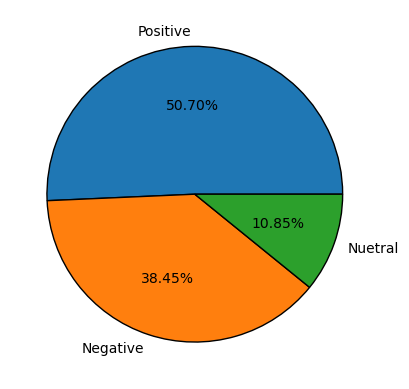

In [55]:
plt.pie(data['Sentiment'].value_counts(),
       labels=['Positive','Negative','Nuetral'],
       autopct='%0.2f%%',wedgeprops={
           'edgecolor':'black'
       })

### Conclusion

The Naive Bayes classifier attains a solid overall accuracy of 80 percent on the 400-sample test set, with macro-averaged precision and recall both at 0.81 and an F1-score of 0.79. These figures indicate balanced behaviour: when the model predicts a label it is correct roughly four-fifths of the time, and it retrieves about the same proportion of true instances. Performance is strongest for classes such as *sci.crypt*, *soc.religion.christian* and *rec.sport.hockey*, each posting F1 scores above 0.80, whereas categories like *comp.windows.x*, *talk.religion.misc* and *sci.electronics* lag behind because of low recall.


Several factors explain the uneven scores. First, class imbalance means minority topics provide too few examples for the model to learn reliable token–class associations. Second, overlapping vocabularies—shared jargon among computer sub-forums or similar rhetoric across political threads—blur decision boundaries and expose Naive Bayes’s independence assumption. Finally, short, noisy posts inflate sparsity, letting rare tokens dominate. 


Sentiment analysis of the same corpus shows a mildly upbeat community: 50.7 percent of posts are positive, 38.45 percent negative and 10.85 percent neutral. Positive polarity likely arises from hobby enthusiasm and success stories, while the sizeable negative share tracks complaint-oriented or contentious subjects—especially politics and religion—highlighting topics that may require moderation attention. The neutral remainder reflects purely informational or technical content. Combining topic and sentiment signals can guide editorial strategy: surface constructive discussions, monitor highly negative clusters for policy compliance and balance user experience with neutral, fact-rich articles.
